INTEGRANTES:

-Ingrid Alonso

-Adriana Garcia B.

# ***Challenge:*** Conversión de grados Celsius a Fahrenheit.

Dados los siguientes datos:

<div class="instructions"><div class="inner">
<div class="devsite-table-wrapper">
  <table class="vertical-rules">
    <tbody>
      <tr>
        <td colspan="1" rowspan="1"><p>Celsius:</p></td>
        <td colspan="1" rowspan="1"><p>-40.0</p></td>
        <td colspan="1" rowspan="1"><p>-10.0</p></td>
        <td colspan="1" rowspan="1"><p>0.0</p></td>
        <td colspan="1" rowspan="1"><p>8.0</p></td>
        <td colspan="1" rowspan="1"><p>15.0</p></td>
        <td colspan="1" rowspan="1"><p>22.0</p></td>
        <td colspan="1" rowspan="1"><p>38.0</p></td>
      </tr>
      <tr>
        <td colspan="1" rowspan="1"><p>Fahrenheit:</p></td>
        <td colspan="1" rowspan="1"><p>-40.0</p></td>
        <td colspan="1" rowspan="1"><p>14.0</p></td>
        <td colspan="1" rowspan="1"><p>32.0</p></td>
        <td colspan="1" rowspan="1"><p>46.0</p></td>
        <td colspan="1" rowspan="1"><p>59.0</p></td>
        <td colspan="1" rowspan="1"><p>72.0</p></td>
        <td colspan="1" rowspan="1"><p>100.0</p></td>
      </tr>
    </tbody>
  </table>
</div>
</div></div>

Visualice los datos a través de un gráfico para analizar el comportamiento de una regresión lineal con los datos en **Celsius** y **Fahrenheit**.

$Recordando$ $la$ $ecuación$ $para$ $la$ $conversión$ $de$ $grados$ $Celcius$ $a$ $Fahrenheit:$

$
F° = C°*1.8 + 32
$

Entrene una red neuronal para predecir los datos siguientes, recordando que, la infraestructura de prueba, espera un modelo entrenado que acepte una forma de entrada de [1].

Realice un test de entrenamiento para verificar las epocas dadas y visualice el comportamiento de las perdidas según el algoritmo utilizado.  

Guarde el modelo anterior en un archivo con el nombre y tipo de dato **mymodel.h5**

## Importamos librerias


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creamos los vectores

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype= float)
fahrenheit = np.array ([-40.0, 14.0, 32.0, 46.0,59.0,72.0,100.0], dtype =float)

## Visualizamos para entender el comportamiento

In [ ]:
def regresion_lineal(x,y,n):
  sumx = sum(x)
  sumy = sum(y)
  sumxy = sum(x*y)
  sumx2 = sum(x*x)

  promx = sumx/n
  promy= sumy/n

  beta = (sumx*sumy-n*sumxy)/((sumx**2) -n*sumx2)
  alpha = promy - beta*promx

  return np.round(beta,2), np.round(alpha)

In [ ]:
m, b =  regresion_lineal(celsius, fahrenheit, len(celsius))
print((f'F={m}C+{b}'))

F=1.8C+32.0


In [ ]:
def visualizacion_regresion(beta, alpha):
  plt.plot(celsius, fahrenheit, 'o', label= 'Datos')
  plt.plot(celsius, beta*celsius + alpha, label='Ajuste')
  plt.title('Celsius a Fahrenheit')
  plt.xlabel('Celsius')
  plt.ylabel('Fahrenheit')
  plt.grid()
  plt.legend();

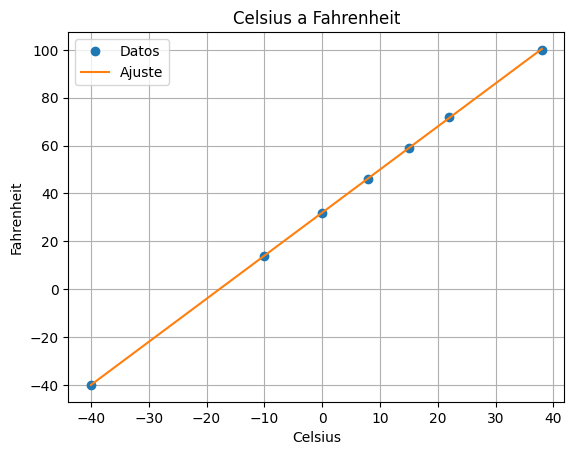

In [ ]:
visualizacion_regresion(m,b)

## Creamos el  modelo

In [ ]:
def modelo(x, y):
  capa = tf.keras.layers.Dense(units = 1, input_shape= [1] )
  modelo = tf.keras.Sequential([capa])

  modelo.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss= 'mse' )

  print('Comenzando el entrenamiento ...')
  historial = modelo.fit(x,y,epochs=500)
  print('Entrenamiento terminado')
  #Prueba de predicción
  resultado = modelo.predict([30])
  print(f'La conversión a Fahrenheit es {resultado}')
  print('--------------------------')
  print(capa.get_weights())
  return modelo, historial


## Probamos el modelo

In [ ]:
modelo, historial = modelo(celsius, fahrenheit)

Comenzando el entrenamiento ...
Epoch 1/500
1/1 [==============================] - 0s 307ms/step - loss: 2291.3616
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 1143.2098
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 894.8809
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1144.5725
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 1292.5114
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 1169.0394
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 916.1309
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 696.8637
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 600.4745
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 621.3862
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 681.4940
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 696.73

## Visualización de la perdida

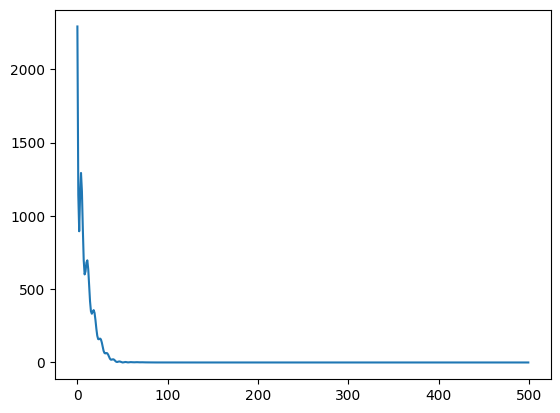

In [ ]:
def visualizacion_perdidas(historial):
  plt.plot(historial.history['loss'])

visualizacion_perdidas(historial)

In [ ]:
if __name__ == '__main__':
  modelo.save('mymodel.h5')
  print('Modelo guardado')

Modelo guardado
